In [161]:
#NO.4 : retention % of the users on each domain
#EDA
import pandas as pd

df8 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday8.csv',error_bad_lines=False)
df9 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday9.csv',error_bad_lines=False)
df10 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday10.csv',error_bad_lines=False)
df11 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday11.csv',error_bad_lines=False)
df12 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday12.csv',error_bad_lines=False)
df13 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday13.csv',error_bad_lines=False)
df14 = pd.read_csv(r'C:\Users\Kong Gu An\LatihanPython_Dian\PROJECT KLY\sampleday14.csv',error_bad_lines=False)

#UNION TABLE
union = pd.concat([df8, df9, df10, df11, df12, df13, df14], ignore_index=True)

print("DATA SAMPLE 5 TERATAS")
print(union.head())

print("\nDATA INFO")
print(union.info())

#DROP COLOUMN WHICH DOESNT HAVE VALUES and HAVE MANY NULL'S
del union['device_id']
del union['connection']
print("TABLE INFO AFTER DELETING SOME COLUMNS")
print(union.info())

#CHANGING COLUMN TIME AND EVENT TIME TO DATETIME TYPE, USER_ID to STRING
union['time'] = pd.to_datetime(union.time)
union['event_time'] = pd.to_datetime(union.event_time)
#union['user_id'] = union['user_id'].astype(str)
print("AFTER CHANGING THE TYPE OF 3 COLUMNS TO DATE TIME")
print(union.info())
print(union.head())

b'Skipping line 19714: expected 19 fields, saw 24\n'
C:\Users\Kong Gu An\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


DATA SAMPLE 5 TERATAS
                                     id               browser_id  \
0  f4ce534f-33b8-406f-8166-cae233cf782b         facebook;304.0.0   
1  dedcf32a-5885-415b-a13b-cd9b99cff168         facebook;236.0.0   
2  721b00f3-e7d6-4e3f-b095-612c513b2158  chrome mobile;88.0.4324   
3  22a6bbf6-aebe-46b1-b89e-c82d5a76cc47         chrome;88.0.4324   
4  eaf614c0-3d1f-4bfd-9937-73d46d2c23ea         facebook;266.0.0   

              os_id           domain_id              device_info_id  \
0         android;9  planet.merdeka.com    samsung;samsung sm-a105g   
1        android;10        m.brilio.net        infinix;infinix x692   
2        android;10          m.bola.com  generic;generic smartphone   
3  mac os x;10.13.2           vidio.com                      ;other   
4     android;8.1.0     m.kapanlagi.com              vivo;vivo 1820   

                               visit_id                            visitor_id  \
0  17ede683-582b-4183-863c-a4ad15156bd7  7b5d1a5a-127c-4e65-b

In [164]:
# GROUPBY COLUMN DOMAIN
retention = union[['id','domain_id']]
print('DATA ID DAN DOMAINNYA (5 teratas):\n', retention.head())

retention_count = retention.groupby('domain_id').count()
retention_count.rename(columns={'id':'Total seluruh ID visit the Domain'}, inplace=True)
print('\nBANYAKNYA ID YANG MENGUNJUNGI DOMAIN (5 teratas):\n', retention_count.head())

DATA ID DAN DOMAINNYA (5 teratas):
                                      id           domain_id
0  f4ce534f-33b8-406f-8166-cae233cf782b  planet.merdeka.com
1  dedcf32a-5885-415b-a13b-cd9b99cff168        m.brilio.net
2  721b00f3-e7d6-4e3f-b095-612c513b2158          m.bola.com
3  22a6bbf6-aebe-46b1-b89e-c82d5a76cc47           vidio.com
4  eaf614c0-3d1f-4bfd-9937-73d46d2c23ea     m.kapanlagi.com

BANYAKNYA ID YANG MENGUNJUNGI DOMAIN (5 teratas):
                                                     Total seluruh ID visit the Domain
domain_id                                                                            
4jhhhf3255m4gm3dokru4ki2k4-adwhj77lcyoafdy-m-me...                                  1
app.otosia.com                                                                     18
awake.kapanlagi.com                                                                 4
bandung.merdeka.com                                                                 3
banyuwangi.merdeka.com              

In [166]:
print('STATISTIC DESCRIPTIVE TABEL RETENTION_COUNT:\n', retention_count.describe())
print('\nNILAI MAKSIMAL DARI TABEL RETENTION_COUNT:\n', retention_count.max())
print('\nID DENGAN NILAI MAKSIMAL DARI TABEL RETENTION:\n', retention['id'].max())
print('\nNILAI MAKSIMAL BANYAKNYA ID DARI TABEL RETENTION_COUNT:\n', retention_count['Total seluruh ID visit the Domain'].sum())

STATISTIC DESCRIPTIVE TABEL RETENTION_COUNT:
        Total seluruh ID visit the Domain
count                          88.000000
mean                         4474.250000
std                         13222.730517
min                             1.000000
25%                             1.000000
50%                             7.000000
75%                           492.500000
max                         80734.000000

NILAI MAKSIMAL DARI TABEL RETENTION_COUNT:
 Total seluruh ID visit the Domain    80734
dtype: int64

ID DENGAN NILAI MAKSIMAL DARI TABEL RETENTION:
 fffff1f7-22df-4ba5-b3cd-60d19cb88715

NILAI MAKSIMAL BANYAKNYA ID DARI TABEL RETENTION_COUNT:
 393734


In [168]:
#MEMBUAT COLUMN BARU PERSENTASE BANYAKNYA ID YANG MENGUNJUNGI DOMAIN TERTENTU
retention_count['Percentage'] = (retention_count['Total seluruh ID visit the Domain']/retention_count['Total seluruh ID visit the Domain'].sum())*100
print(retention_count)
print(retention_count.info())

20.504706222983028
                                                    Total seluruh ID visit the Domain  \
domain_id                                                                               
4jhhhf3255m4gm3dokru4ki2k4-adwhj77lcyoafdy-m-me...                                  1   
app.otosia.com                                                                     18   
awake.kapanlagi.com                                                                 4   
bandung.merdeka.com                                                                 3   
banyuwangi.merdeka.com                                                              1   
...                                                                               ...   
video.merdeka.com                                                                   1   
vidio.com                                                                       11446   
vote.kapanlagi.com                                                                  8   
we

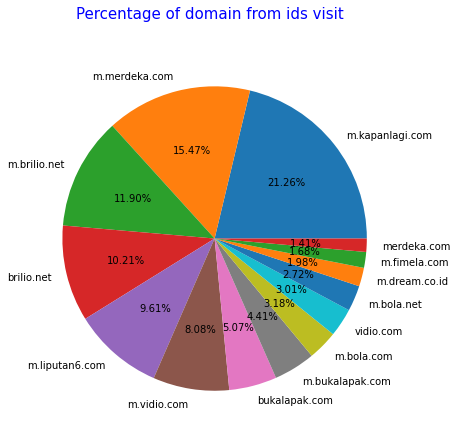

In [148]:
#MEMBUAT PIE CHART
import matplotlib.pyplot as plt

def autopct_more_than_1(pct):
    return ('%1.2f%%' % pct) if pct > 1 else ''
#autopct='%1.2f%%' = persen dengan dua angka di belakang koma

#MENYELEKSI 14 DATA TERATAS PEROLEHAN DOMAIN YANG BANYAK DIKUNJUNGI DENGAN PERCENTAGE > 1%
retention_pie = retention.groupby('domain_id')['id'].count().reset_index().sort_values(by=['id'], ascending=False).head(14)
plt.figure(figsize=(7,7))
plt.pie(retention_pie['id'], labels=retention_pie['domain_id'], autopct=autopct_more_than_1)
plt.title('Percentage of domain from id''s visit  ', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

In [160]:
retention2 = union[['user_id','domain_id']]
retention_count2 = retention2.groupby('user_id').count()
retention_count2

,domain_id
user_id,
4.0,32
12.0,10
44.0,1
139.0,8
1075.0,2
...,...
59749972.0,1
59750935.0,1
59751479.0,1
